<h1 style="text-align: center;">Deep Learning<br><br>Session - 7<br><br>Image Classification with CNN<br><br>Malaria Data<br><h1>


# Dataset Info

The dataset contains 2 folders - 'parasitized', 'uninfected'

And a total of 27,558 images.

This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

The dataset contains 2 folders - 'parasitized', 'uninfected'
And a total of 27,558 images.
This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/

Malaria remains a major burden on global health, with roughly 200 million cases worldwide and more than 400,000 deaths per year. Besides biomedical research and political efforts, modern information technology is playing a key role in many attempts at fighting the disease.
Malaria is caused by protozoan parasites of the genus Plasmodium that are transmitted through the bites of infected female Anopheles mosquitoes and that infect the red blood cells. Most deaths occur among children in Africa, where a child dies almost every minute from malaria, and where malaria is a leading cause of childhood neuro-disability. According to the World Malaria Report 2016,1 an estimated 3.2 billion people in 95 countries and territories are at risk of being infected with malaria and developing disease, and 1.2 billion are at high risk (>1 in 1000 chance of getting malaria in a year).
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5840030/


# Import Libraries and Export Images from Zip_File

In [69]:
import os  # opration system
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [70]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Recognizing and Understanding Data

In [72]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/DL-S7/cell_images.zip", "r")
zip_ref.extractall()
zip_ref.close() 

In [73]:
my_data_dir = "cell_images"

In [74]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [75]:
test_path = my_data_dir + '/test/'  # cell_images/test
train_path = my_data_dir + '/train/'  # # cell_images/train

In [76]:
os.listdir(test_path) # list folders in test folder

['uninfected', 'parasitized']

In [77]:
os.listdir(train_path)  # # list folders in train folder

['uninfected', 'parasitized']

In [78]:
classes = os.listdir(train_path)
classes

['uninfected', 'parasitized']

In [79]:
# Alternative method
import pathlib

data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['parasitized' 'uninfected']


In [80]:
class_names

array(['parasitized', 'uninfected'], dtype='<U11')

**Let's check how many images there are.**

In [81]:
os.listdir(train_path+'parasitized')  # /content/cell_images/train/parasitized

['C133P94ThinF_IMG_20151004_153930_cell_107.png',
 'C82P43ThinF_IMG_20150817_124418_cell_173.png',
 'C182P143NThinF_IMG_20151201_172216_cell_129.png',
 'C178P139NThinF_IMG_20151201_154254_cell_1.png',
 'C91P52ThinF_IMG_20150821_123314_cell_193.png',
 'C129P90ThinF_IMG_20151004_133703_cell_99.png',
 'C67P28N_ThinF_IMG_20150819_121053_cell_236.png',
 'C137P98ThinF_IMG_20151005_163218_cell_75.png',
 'C153P114ThinF_IMG_20151115_135911_cell_250.png',
 'C182P143NThinF_IMG_20151201_171905_cell_158.png',
 'C119P80ThinF_IMG_20151002_123911_cell_143.png',
 'C78P39ThinF_IMG_20150606_103413_cell_166.png',
 'C84P45ThinF_IMG_20150818_104849_cell_19.png',
 'C81P42ThinF_IMG_20150817_120712_cell_165.png',
 'C68P29N_ThinF_IMG_20150819_134112_cell_112.png',
 'C39P4thinF_original_IMG_20150622_113126_cell_9.png',
 'C84P45ThinF_IMG_20150818_101903_cell_4.png',
 'C129P90ThinF_IMG_20151004_133538_cell_97.png',
 'C101P62ThinF_IMG_20150918_151239_cell_75.png',
 'C66P27N_ThinF_IMG_20150818_164702_cell_155.png',


In [82]:
len(os.listdir(train_path+'parasitized')), len(os.listdir(train_path+'uninfected'))  # classes are balanced

(12479, 12479)

In [83]:
len(os.listdir(test_path+'parasitized')), len(os.listdir(test_path+'uninfected'))

(1300, 1300)

In [84]:
os.walk(my_data_dir)

<generator object walk at 0x7f6ebd3d7190>

In [85]:
# Walk through cell_images directory and list number of files
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'cell_images'.
There are 2 directories and 0 images in 'cell_images/test'.
There are 0 directories and 1300 images in 'cell_images/test/uninfected'.
There are 0 directories and 1300 images in 'cell_images/test/parasitized'.
There are 2 directories and 0 images in 'cell_images/train'.
There are 0 directories and 12479 images in 'cell_images/train/uninfected'.
There are 0 directories and 12479 images in 'cell_images/train/parasitized'.


**Let's take an example images from both train-parasitized and train-uninfected folders to observe process** 

In [86]:
os.listdir(train_path+'parasitized')[:10]  # top 10 images

['C133P94ThinF_IMG_20151004_153930_cell_107.png',
 'C82P43ThinF_IMG_20150817_124418_cell_173.png',
 'C182P143NThinF_IMG_20151201_172216_cell_129.png',
 'C178P139NThinF_IMG_20151201_154254_cell_1.png',
 'C91P52ThinF_IMG_20150821_123314_cell_193.png',
 'C129P90ThinF_IMG_20151004_133703_cell_99.png',
 'C67P28N_ThinF_IMG_20150819_121053_cell_236.png',
 'C137P98ThinF_IMG_20151005_163218_cell_75.png',
 'C153P114ThinF_IMG_20151115_135911_cell_250.png',
 'C182P143NThinF_IMG_20151201_171905_cell_158.png']

In [87]:
os.listdir(train_path+'parasitized')[5]

'C129P90ThinF_IMG_20151004_133703_cell_99.png'

In [88]:
para_cell_path = train_path+'parasitized/'+os.listdir(train_path+'parasitized')[5]

In [89]:
para_cell_path

'cell_images/train/parasitized/C129P90ThinF_IMG_20151004_133703_cell_99.png'

In [90]:
imread(para_cell_path)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [91]:
para_cell= imread(para_cell_path)

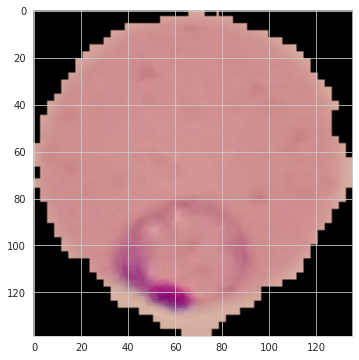

In [92]:
plt.imshow(para_cell);

In [93]:
para_cell.shape  # 139 x 136 and 3 channels

(139, 136, 3)

In [94]:
os.listdir(train_path+'uninfected')[:10]

['C80P41ThinF_IMG_20150817_110834_cell_105.png',
 'C120P81ThinF_IMG_20151002_130150_cell_120.png',
 'C225ThinF_IMG_20151112_113836_cell_14.png',
 'C58P19thinF_IMG_20150802_122520_cell_109.png',
 'C7NthinF_IMG_20150611_104404_cell_199.png',
 'C84P45ThinF_IMG_20150818_101257_cell_43.png',
 'C181P142ThinF_IMG_20151127_160434_cell_28.png',
 'C61P22N_ThinF_IMG_20150818_112252_cell_183.png',
 'C125P86ThinF_IMG_20151004_102053_cell_83.png',
 'C112P73ThinF_IMG_20150930_131401_cell_49.png']

In [95]:
uninfected_cell_path = train_path+'uninfected/'+os.listdir(train_path+'uninfected')[5]

In [96]:
imread(uninfected_cell_path)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

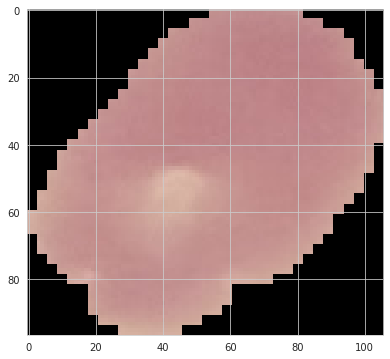

In [97]:
#plt.imshow(imread(uninfected_cell_path));
uninfected_cell = imread(uninfected_cell_path)
plt.imshow(uninfected_cell);

In [98]:
uninfected_cell.shape

(97, 106, 3)

In [99]:
# View a random image
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (118, 130, 3)


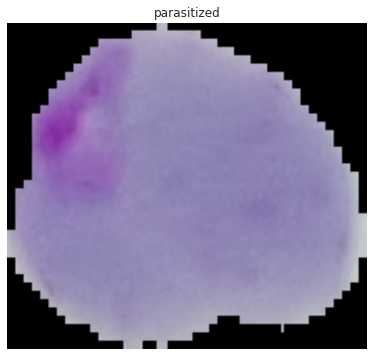

In [100]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="parasitized")

Image shape: (133, 145, 3)


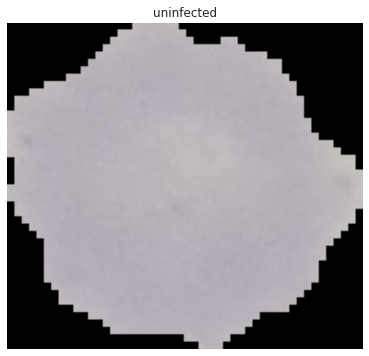

In [101]:
# View a random image from the training dataset
img = view_random_image(target_dir=train_path,
                        target_class="uninfected")

Image shape: (130, 154, 3)


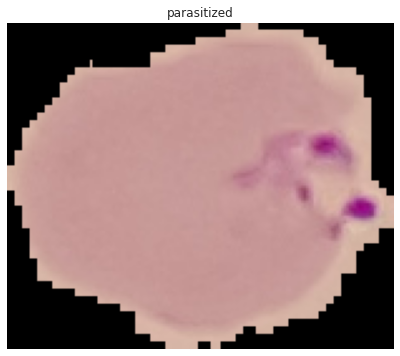

In [102]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(class_names)) # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [103]:
uninfected_cell.shape

(97, 106, 3)

In [104]:
para_cell.shape

(139, 136, 3)

x = []
y = []

for image in os.listdir(train_path+'uninfected'):
    img = imread(train_path+'uninfected/'+image)
    d1,d2,_ = img.shape
    x.append(d1)
    y.append(d2)

In [105]:
x = [imread(train_path+'uninfected/'+image).shape[0] for image in os.listdir(train_path+'uninfected')] 
y = [imread(train_path+'uninfected/'+image).shape[1] for image in os.listdir(train_path+'uninfected')] 

In [106]:
len(x)

12479

In [107]:
x[:5]

[139, 121, 133, 130, 133]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


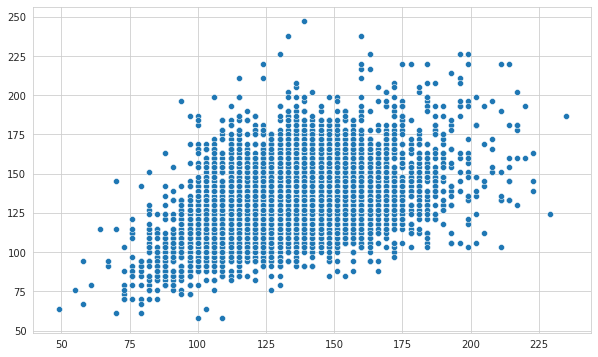

In [108]:
sns.scatterplot(x,y);  # distribution of shape of images

In [109]:
# checking mean and median of x, that is, rows
np.mean(x), np.median(x)

(131.64820899110507, 130.0)

In [110]:
# checking mean and median of y, that is, columns
np.mean(y), np.median(y)

(131.4041990544114, 130.0)

In [111]:
# Identifying the shape of all images
image_shape = (130,130,3)

## Scaling

**Let's check the images if they are needed to be scaled or not**

In [112]:
uninfected_cell.min(), uninfected_cell.max()

(0.0, 0.8745098)

In [113]:
para_cell.min(),para_cell.max()

(0.0, 0.8862745)

As we see above, all images have been already scaled

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have.

ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [114]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# help(ImageDataGenerator)

In [115]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               #rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

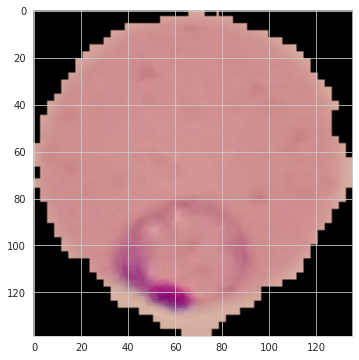

In [116]:
plt.imshow(para_cell);

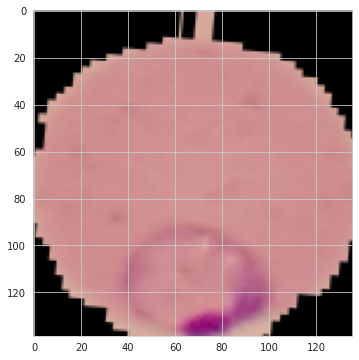

In [117]:
plt.imshow(image_gen.random_transform(para_cell));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [ ]:
#help(image_gen.flow_from_directory)
#Takes the path to a directory & generates batches of augmented data.

In [118]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [119]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [120]:
batch_size = 32

In [128]:
image_shape

(130, 130, 3)

In [123]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)  # shuffle işlem yaparken datayı sürekli kar. aynı sırayla gelince ezberlemeye meyli oluyor. farklı sırada gelince genellemesi daha iyi olur.

Found 24958 images belonging to 2 classes.


In [124]:
len(os.listdir(train_path+'parasitized')), len(os.listdir(train_path+'uninfected'))

(12479, 12479)

In [126]:
test_image_gen = image_gen.flow_from_directory(directory=test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)
# Burada shuffle ı False almamızın sebebi, prediction yaparken y_test, y_pred i karşılaştıramayız. Yani evaluation da sorun yaşarız.

Found 2600 images belonging to 2 classes.


In [125]:
len(os.listdir(test_path+'parasitized')), len(os.listdir(test_path+'uninfected'))

(1300, 1300)

In [129]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [131]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [132]:
train_image_gen[0]

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [133]:
train_image_gen[0][0].shape

(32, 130, 130, 3)

In [134]:
train_image_gen[0][0][0].shape

(130, 130, 3)

In [136]:
len(train_image_gen), len(test_image_gen)

(780, 82)

In [137]:
len(train_image_gen)*batch_size, len(test_image_gen)*batch_size 

(24960, 2624)

In [138]:
# Get a sample of the training data batch 
images, labels = train_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [139]:
# Get a sample of the testing data batch 
images, labels = test_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling-1

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [142]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.001)
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [143]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [144]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [145]:
model1.fit(train_image_gen,
          epochs=10,
          steps_per_epoch=len(train_image_gen),  # herbir epoch ta train_image_gen ne kadar çalışsın
          validation_data=test_image_gen,
          validation_steps=len(test_image_gen),
          callbacks=[early_stop])

Epoch 1/10
780/780 [==============================] - 141s 171ms/step - loss: 1.2082 - accuracy: 0.5566 - val_loss: 0.6771 - val_accuracy: 0.5923
Epoch 2/10
780/780 [==============================] - 130s 167ms/step - loss: 0.6777 - accuracy: 0.5822 - val_loss: 0.7233 - val_accuracy: 0.5562
Epoch 3/10
780/780 [==============================] - 135s 173ms/step - loss: 0.6682 - accuracy: 0.6002 - val_loss: 0.6633 - val_accuracy: 0.6115
Epoch 4/10
780/780 [==============================] - 131s 168ms/step - loss: 0.6674 - accuracy: 0.6020 - val_loss: 0.6743 - val_accuracy: 0.6077
Epoch 5/10
780/780 [==============================] - 132s 169ms/step - loss: 0.6616 - accuracy: 0.6091 - val_loss: 0.6625 - val_accuracy: 0.6123
Epoch 6/10
780/780 [==============================] - 129s 166ms/step - loss: 0.6551 - accuracy: 0.6217 - val_loss: 0.6493 - val_accuracy: 0.6338
Epoch 7/10
780/780 [==============================] - 134s 171ms/step - loss: 0.6551 - accuracy: 0.6264 - val_loss: 0.6526 -

In [146]:
model1.metrics_names

['loss', 'accuracy']

In [147]:
summary = pd.DataFrame(model1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.208,0.557,0.677,0.592
1,0.678,0.582,0.723,0.556
2,0.668,0.600,0.663,0.612
3,0.667,0.602,0.674,0.608
4,0.662,0.609,0.663,0.612


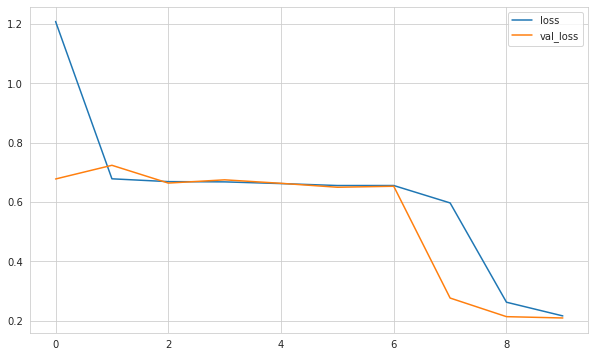

In [148]:
summary[["loss", "val_loss"]].plot();

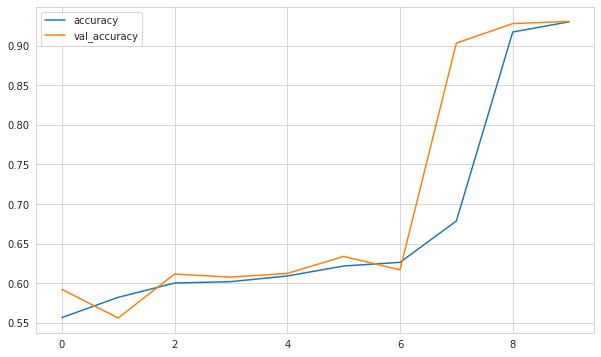

In [149]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [150]:
from sklearn.metrics import classification_report, confusion_matrix

In [151]:
score = model1.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 12s 145ms/step - loss: 0.2097 - accuracy: 0.9319
Test loss: 0.20971572399139404
Test accuracy: 0.9319230914115906


In [152]:
pred_prob = model1.predict(test_image_gen)

82/82 [==============================] - 12s 142ms/step


In [153]:
pred_prob

array([[0.00849999],
       [0.00489447],
       [0.00219378],
       ...,
       [0.9643404 ],
       [0.8461741 ],
       [0.9674969 ]], dtype=float32)

In [154]:
y_pred = pred_prob > 0.5

In [155]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [156]:
y_test = test_image_gen.classes
y_test

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [157]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1300
           1       0.91      0.96      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.93      0.93      0.93      2600
weighted avg       0.93      0.93      0.93      2600



In [158]:
confusion_matrix(y_test, y_pred)

array([[1180,  120],
       [  58, 1242]])

# Modelling-2

In [159]:
model2 = Sequential()

model2.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())


model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [160]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 130, 130, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 65, 65, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 65, 65, 128)       73856     
                                                                 
 conv2d_5 (Conv2D)           (None, 65, 65, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 256)      

In [161]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [162]:
model2.fit(train_image_gen,
          epochs=8,
          steps_per_epoch=len(train_image_gen),
          validation_data=test_image_gen,
          validation_steps=len(test_image_gen),
          callbacks=[early_stop])

Epoch 1/8
780/780 [==============================] - 159s 199ms/step - loss: 0.7338 - accuracy: 0.5362 - val_loss: 0.6854 - val_accuracy: 0.5769
Epoch 2/8
780/780 [==============================] - 148s 190ms/step - loss: 0.6881 - accuracy: 0.5429 - val_loss: 0.6710 - val_accuracy: 0.5950
Epoch 3/8
780/780 [==============================] - 148s 190ms/step - loss: 0.5059 - accuracy: 0.7234 - val_loss: 0.2106 - val_accuracy: 0.9435
Epoch 4/8
780/780 [==============================] - 149s 190ms/step - loss: 0.1883 - accuracy: 0.9445 - val_loss: 0.1715 - val_accuracy: 0.9427
Epoch 5/8
780/780 [==============================] - 146s 187ms/step - loss: 0.1638 - accuracy: 0.9514 - val_loss: 0.1611 - val_accuracy: 0.9492
Epoch 6/8
780/780 [==============================] - 146s 187ms/step - loss: 0.1592 - accuracy: 0.9502 - val_loss: 0.1641 - val_accuracy: 0.9450
Epoch 7/8
780/780 [==============================] - 147s 188ms/step - loss: 0.1560 - accuracy: 0.9532 - val_loss: 0.1498 - val_ac

In [163]:
model2.metrics_names

['loss', 'accuracy']

In [164]:
summary = pd.DataFrame(model2.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.734,0.536,0.685,0.577
1,0.688,0.543,0.671,0.595
2,0.506,0.723,0.211,0.943
3,0.188,0.945,0.172,0.943
4,0.164,0.951,0.161,0.949


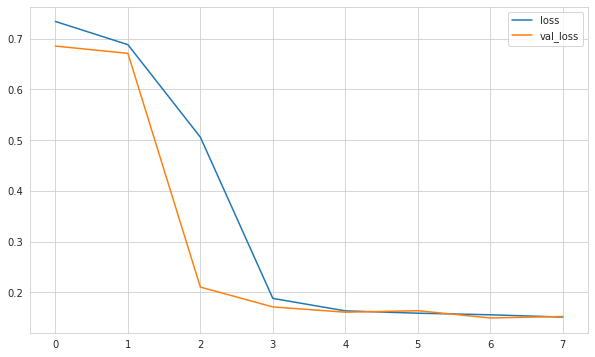

In [165]:
summary[["loss", "val_loss"]].plot();

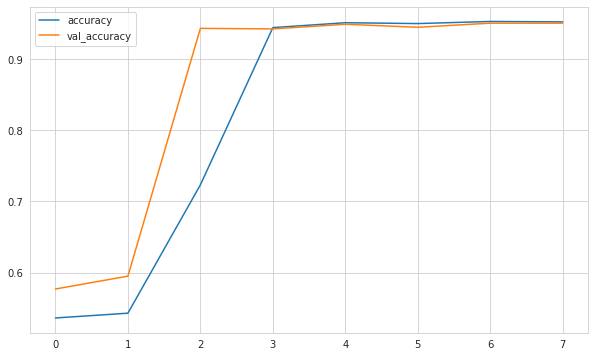

In [166]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [167]:
score = model2.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

82/82 [==============================] - 13s 152ms/step - loss: 0.1473 - accuracy: 0.9508
Test loss: 0.14726482331752777
Test accuracy: 0.9507692456245422


In [168]:
pred_prob = model2.predict(test_image_gen)

82/82 [==============================] - 13s 153ms/step


In [169]:
y_pred = pred_prob > 0.5

In [170]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1300
           1       0.94      0.96      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



                precision    recall  f1-score   support

           0       0.96      0.93      0.95      1300
           1       0.93      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600

In [171]:
confusion_matrix(y_test, y_pred)

array([[1226,   74],
       [  54, 1246]])

In [172]:
model1.save('malaria_model.h5')

In [173]:
model2.save('malaria_model2.h5')

# Prediction

In [190]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [191]:
model=load_model('malaria_model2.h5')

In [192]:
target_class=random.choice(class_names)
target_class

'uninfected'

In [193]:
random_image = random.sample(os.listdir(test_path + target_class), 1)
random_image

['C158P119ThinF_IMG_20151115_181035_cell_92.png']

In [194]:
image_path = test_path + target_class + "/" + random_image[0]
image_path

'cell_images/test/uninfected/C158P119ThinF_IMG_20151115_181035_cell_92.png'

In [195]:
my_image = image.load_img(image_path, target_size=image_shape)

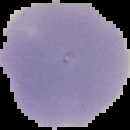

In [196]:
my_image

In [197]:
type(my_image)

PIL.Image.Image

In [198]:
#my_image = np.array(my_image)
my_image = image.img_to_array(my_image)

In [199]:
my_image.shape

(130, 130, 3)

In [200]:
my_image = np.expand_dims(my_image, axis=0)

In [201]:
my_image.shape

(1, 130, 130, 3)

In [202]:
model.predict(my_image)

1/1 [==============================] - 0s 460ms/step


array([[0.9908977]], dtype=float32)

In [203]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [204]:
def pred_and_plot(model, img_size):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  target_class=random.choice(class_names)
  random_image = random.sample(os.listdir(test_path + target_class), 1)
  img_path = test_path + target_class + "/" + random_image[0]
  img = image.load_img(img_path, target_size=img_size)
  img = np.array(img)
  
  # Make a prediction
  pred = model.predict(np.expand_dims(img, axis=0))
  print("prediction_probability: ", pred.max())

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 103ms/step
prediction_probability:  0.9925235


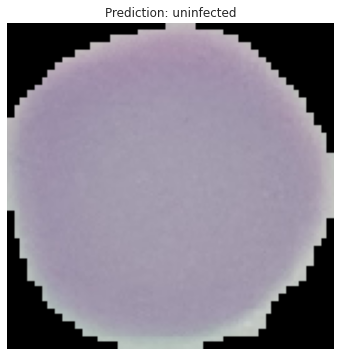

In [205]:
pred_and_plot(model, (130, 130))